# Quantum Algorithms

# 1.Grover’s algorithm

Enter a number between 0 and 15:  10


Marked element in decimal: 10
Result: {'1000': 71, '0000': 64, '1101': 77, '0100': 78, '1010': 965, '1111': 80, '0110': 80, '1100': 66, '0010': 68, '0011': 70, '1011': 68, '0001': 87, '0101': 57, '0111': 73, '1110': 65, '1001': 79}


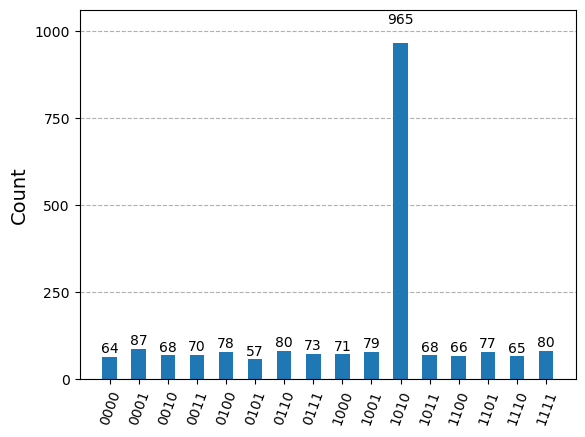

In [6]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

barriers=True

def grover_oracle(qc, marked_element, n):
    if barriers:
        qc.barrier()
    for i in range(n):
        if (marked_element >> i) & 1 == 0:
            qc.x(i)
    if barriers:
        qc.barrier()        
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    if barriers:
        qc.barrier()
    for i in range(n):
        if (marked_element >> i) & 1 == 0:
            qc.x(i)
def diffusion_operator(qc, n):
    if barriers:
        qc.barrier()
    qc.h(range(n))
    qc.x(range(n))
    if barriers:
        qc.barrier()
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    if barriers:
        qc.barrier()
    qc.x(range(n))
    qc.h(range(n))

def grovers_algorithm(n, marked_element, iterations):
    qc = QuantumCircuit(n, n)
    if barriers:
        qc.barrier()
    qc.h(range(n))
    
    for _ in range(iterations):
        grover_oracle(qc, marked_element, n)
        diffusion_operator(qc, n)
    
    qc.measure(range(n), range(n))
    return qc

# User input for marked element in decimal form
marked_element_input = int(input("Enter a number between 0 and 15: "))
marked_element = marked_element_input
print("Marked element in decimal:", marked_element)

# Parameters
n = 4  # Number of qubits
iterations = 1  # Number of Grover iterations

# Create and run the circuit
qc = grovers_algorithm(n, marked_element, iterations)
backend = Aer.get_backend('qasm_simulator')
counts = backend.run(qc,shots=2048).result().get_counts()

# Display the result
print("Result:", counts)
plot_histogram(counts)

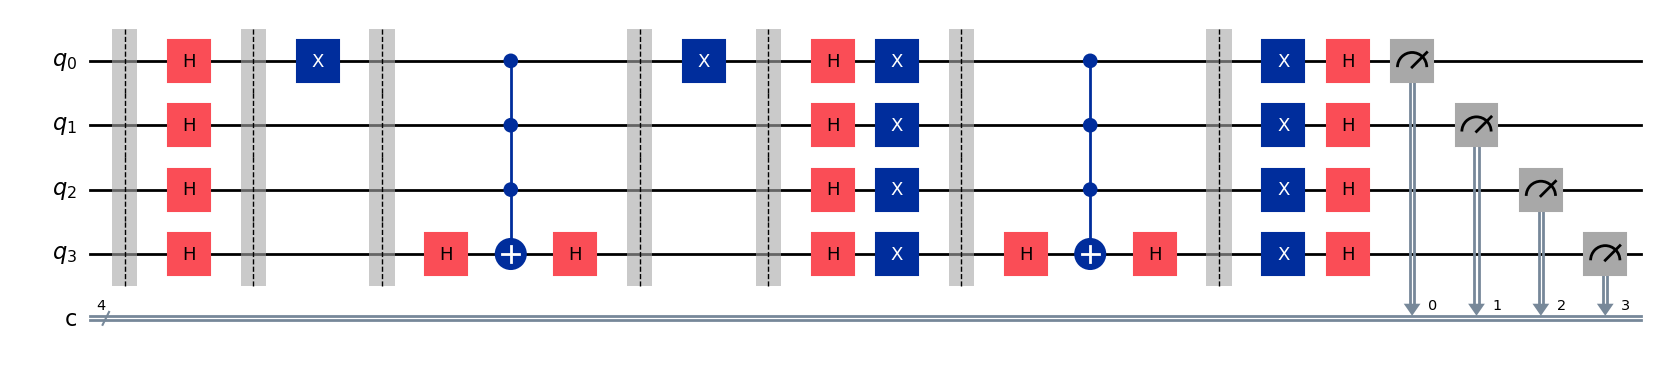

In [4]:
qc.draw('mpl')

# 2.Simon’s Algorithm

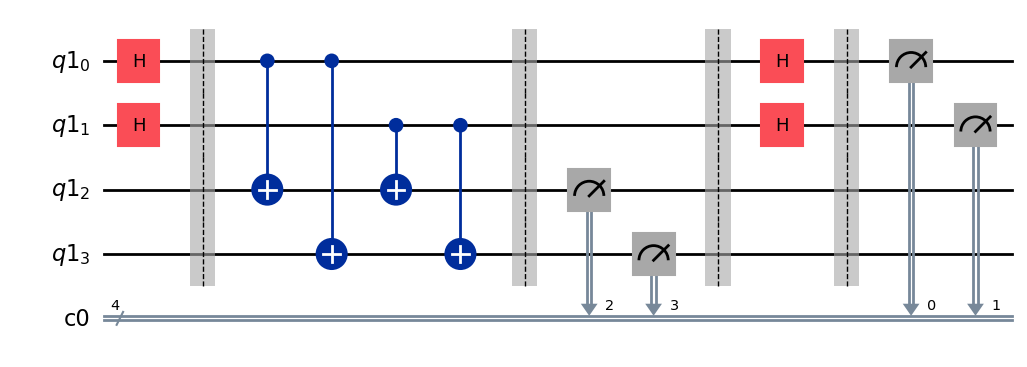

In [9]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 
 
# importing Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
# import basic plot tools
from qiskit.visualization import plot_histogram

s = '11'
# Creating registers
# qubits for querying the oracle and finding the hidden period s
qr = QuantumRegister(2*len(str(s)))
# classical registers for recording the measurement from qr
cr = ClassicalRegister(2*len(str(s))) 
 
simonCircuit = QuantumCircuit(qr, cr)
barriers = True 
 
# Apply Hadamard gates before querying the oracle
for i in range(len(str(s))):
    simonCircuit.h(qr[i])  

# Apply barrier 
if barriers:
    simonCircuit.barrier() 

# Apply the query function
# 2-qubit oracle for s = 11
#simonCircuit.cx(qr[0], qr[len(str(s)) + 0])
#simonCircuit.cx(qr[0], qr[len(str(s)) + 1])
#simonCircuit.cx(qr[1], qr[len(str(s)) + 0])
#simonCircuit.cx(qr[1], qr[len(str(s)) + 1])

for control in range(2):
    for target_offset in range(2):
        target = len(str(s)) + target_offset
        simonCircuit.cx(qr[control], qr[target])
        
# Apply barrier 
if barriers:
    simonCircuit.barrier() 
# Measure ancilla qubits
for i in range(len(str(s)), 2*len(str(s))):
    simonCircuit.measure(qr[i], cr[i]) 
# Apply barrier 
if barriers:
    simonCircuit.barrier() 
# Apply Hadamard gates to the input register
for i in range(len(str(s))):
    simonCircuit.h(qr[i]) 
# Apply barrier 
if barriers:
    simonCircuit.barrier() 
# Measure input register
for i in range(len(str(s))):
    simonCircuit.measure(qr[i], cr[i])
    
simonCircuit.draw(output='mpl')

{'00': 1018, '11': 1030}


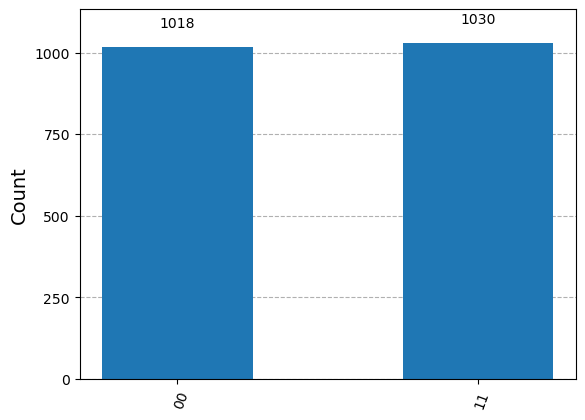

In [11]:
# use local simulator
backend = Aer.get_backend('qasm_simulator')
shots = 2048
answer = backend.run(simonCircuit,shots=shots).result().get_counts()
 
# Categorize measurements by input register values
answer_plot = {}
for measresult in answer.keys(): 
    measresult_input = measresult[len(str(s)):] 
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult] 
    else: 
        answer_plot[measresult_input] = answer[measresult]  
 
# Plot the categorized results
print( answer_plot )
plot_histogram(answer_plot)

# 3.Deutsch-Jozsa Algorithm

{'1111': 1024}


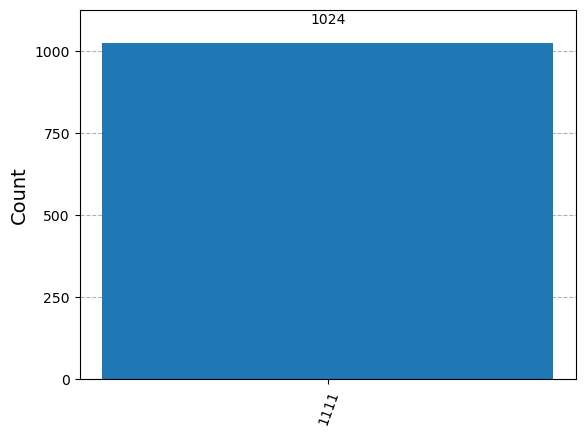

In [14]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# set the length of the n-bit string
n = 4

# set the oracle, b for balanced, c for constant
oracle = "b"

# if the oracle is balanced, set the hidden bitstring, b
if oracle == "b":
    b = 15

# if the oracle is constant, set c = 0 or 1 randomly
if oracle == "c":
    c = np.random.randint(2)

# Creating registers
# n qubits for querying the oracle and one qubit for storing the answer
qr = QuantumRegister(n+1)
cr = ClassicalRegister(n)
djCircuit = QuantumCircuit(qr, cr)
barriers = True

#Applying an X gate to the first qubits since its zero by default |0>
djCircuit.x(qr[n])

# Apply barrier
if barriers:
    djCircuit.barrier()

# Apply Hadamard gates to all qubits
djCircuit.h(qr)

# Apply barrier
if barriers:
    djCircuit.barrier()

# Query the oracle
if oracle == "c":  # if the oracle is constant, return c
    if c == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.id(qr[n])
else:  # otherwise, the oracle is balanced and it returns the inner product of the input with b (non-zero)
    for i in range(n):
        if(b & (1 << i)):
            djCircuit.cx(qr[i], qr[n])

# Apply barrier
if barriers:
    djCircuit.barrier()

# Apply Hadamard gates to all register
for i in range(n):
    djCircuit.h(qr[i])

#Taking measurements
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
qobj = backend.run(djCircuit, shots=1024)
result = qobj.result()
counts = result.get_counts()

# Plot the results
print(counts)
plot_histogram(counts)

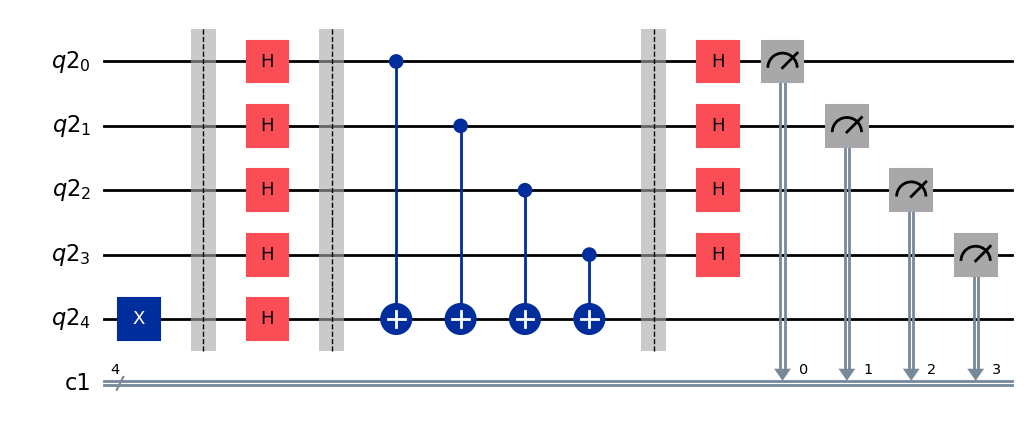

In [16]:
djCircuit.draw('mpl')

# 4.Bernstein-Vazirani Algorithm

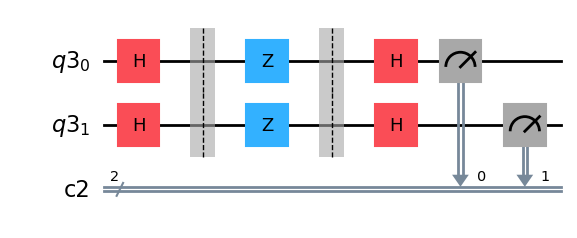

In [19]:
#Initialization and importing the qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

#Defining the number of qubit
nQubit=2
s=3 #hidden integer
S=s%2*nQubit 

#Defining the QuantumRegister and ClassicalRgister 
qr=QuantumRegister(nQubit)
cr=ClassicalRegister(nQubit)
QC=QuantumCircuit(qr,cr)

#Applying Hadamard gate to all the nQubits 
for i in range(nQubit):
    QC.h(qr[i])

#Applying barriers
barriers=True

if barriers:
    QC.barrier()

#Query the oracle 
for i in range(nQubit):
    if (s & (1<<i)):
        QC.z(qr[i])

if barriers:
    QC.barrier()
    
#Applying Hadamard to all the nQubit
for i in range(nQubit):
    QC.h(qr[i])

#Measurement
QC.measure(qr,cr)

#Drawing the qunatum circuits 
QC.draw('mpl')

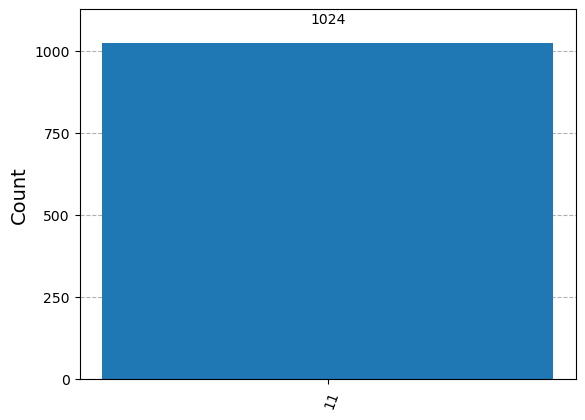

In [21]:
#Simulator 
Backend=Aer.get_backend("qasm_simulator")
count=Backend.run(QC, shots=1024).result().get_counts()

#Ploting the circuit
plot_histogram(count)